# Experiment 1
Code Overview :

+ select three features manually. description - title - price
+ tf-idf to get embedding of non numeric features
+ TSVD for dimention reduction
+ here is two example. first one has dataset with non uniform distribution and 
the second one has dataset with uniform distribution.


In [1]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=602f97cbe84b67c49b78b713bcd353bcfdbf50f9daf3c482e019b858a23b7789
  Stored in directory: /root/.cache/pip/wheels/ac/62/f6/88933dadcd64a1614894614aa68cf57c4b8e5256acb650b1f1
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp39-cp39-linux_x86_64.whl size=180344 sha256=723942ceb8a5c475ad05495f1d171aa4d4cd180fb05ff176988a86f67748a33c
  Stored in directory: /root/.cache/pip/wheels/8e/ff/82/9326b96f96f47472e02c453697b225813e4650c0ed4df2cd49
Successfully built nltk libwapiti
  Attempting unin

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hazm import Normalizer, sent_tokenize,word_tokenize,Lemmatizer,Stemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import codecs

In [7]:
divar_df = pd.read_csv('divar_sample_50k.csv')

## Non-Uniform data distribution example

In [8]:
non_uniform_sample_df = divar_df[np.setdiff1d(divar_df.columns, ['level_0'])].sample(n=10000).reset_index()

In [9]:
non_uniform_input_x = non_uniform_sample_df[np.setdiff1d(divar_df.columns, ['cat1'])]
non_uniform_output_y = non_uniform_sample_df['cat1']

### Plot data distribution

<Axes: xlabel='cat1', ylabel='Count'>

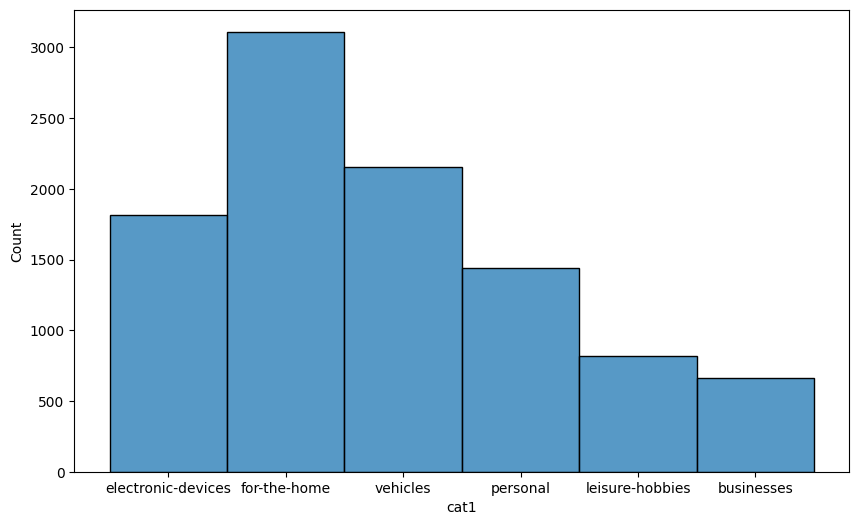

In [10]:
f, ax = plt.subplots(figsize=(10,6))
sns.histplot(data = non_uniform_output_y)

### show correlation between each attribute

<ipython-input-11-026c477b4cff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = non_uniform_input_x.corr()
<ipython-input-11-026c477b4cff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(non_uniform_input_x.corr())


<Axes: >

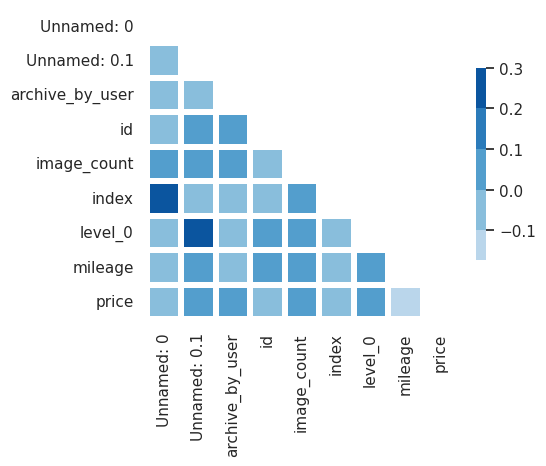

In [11]:
sns.set_theme(style="white")
corr = non_uniform_input_x.corr()
mask = np.triu(non_uniform_input_x.corr())
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.color_palette("Blues")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

### Preprocessing non numeric data

removing stopwords

In [12]:
normalizer = Normalizer()
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open(
    'stopwords.txt', 'r', 'utf-8').readlines()]
stopwords.extend(['تماس', 'تلگرام', 'واتساپ', 'با سلام', 'سلام', 'فروش', 'فوری',
                 'قیمت', 'مقطوع', 'تخفیف', 'نو', 'در حد نو', 'خرید', 'اقساطی', 'تحویل', 'اقساط'])

In [13]:
for idx , sent in enumerate(non_uniform_input_x['desc']):
    sent = sent.replace('$NUM' , ' ')
    non_uniform_input_x['desc'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])
    if idx % 1000 == 0:
      print(idx)

<ipython-input-13-8ac22056d9fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_uniform_input_x['desc'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [14]:
for idx , sent in enumerate(non_uniform_input_x['title']):
    sent = normalizer.normalize(sent)
    non_uniform_input_x['title'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])
    if idx % 1000 == 0:
      print(idx)

<ipython-input-14-24f9c9c21664>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_uniform_input_x['title'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


### TF-IDF & TSVD

In [15]:
normalizer = Normalizer()
scalar = StandardScaler()
numeric_scaled_features = pd.DataFrame(scalar.fit_transform(non_uniform_input_x[['price']]) , columns=['price'])

In [16]:
tfidf_generator = TfidfVectorizer(ngram_range=(1, 1), norm='l2', use_idf=True, preprocessor=normalizer.normalize, tokenizer=word_tokenize)
desc_tfidt_matrix = tfidf_generator.fit_transform(non_uniform_input_x['desc'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [17]:
tfidf_generator = TfidfVectorizer(ngram_range=(1, 1), norm='l2', use_idf=True, preprocessor=normalizer.normalize, tokenizer=word_tokenize)
title_tfidt_matrix = tfidf_generator.fit_transform(non_uniform_input_x['title'])

In [18]:
svd = TruncatedSVD(n_components=100, n_iter=7)
svd.fit(desc_tfidt_matrix)
desc_data_svd = svd.transform(desc_tfidt_matrix)
desc_data_svd = pd.DataFrame(desc_data_svd, columns=[i for i in range(0,100)])

In [19]:
svd = TruncatedSVD(n_components=100, n_iter=7)
svd.fit(title_tfidt_matrix)
title_data_svd = svd.transform(title_tfidt_matrix)
title_data_svd = pd.DataFrame(title_data_svd, columns=[i for i in range(100,200)])

In [20]:
non_uniform_input_x = pd.concat([desc_data_svd , title_data_svd , numeric_scaled_features], axis=1) 

all_data_df = pd.concat([non_uniform_input_x ,non_uniform_output_y], axis=1) 
all_data_df.to_csv('tfidf_tsvd_non_uniform_df.csv')

### Model Selection and train it
Logistic Regression

In [39]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(6), range(6))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [40]:
non_uniform_input_x.columns = non_uniform_input_x.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(non_uniform_input_x, non_uniform_output_y, test_size=0.25, random_state=16)

In [44]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The f1 score for the testing data: 0.7271701059734088


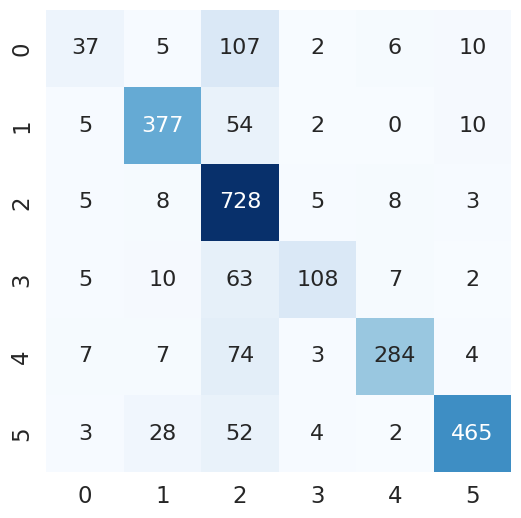

In [45]:
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, y_pred , average='macro')
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, y_pred)

In [43]:
accuracy_score(y_test, y_pred)

0.7596

## Uniform Distribution
the flow of codes is as same as the non uniform example

In [24]:
uniform_sample_df = divar_df[np.setdiff1d(divar_df.columns, ['level_0'])].sample(n = 10000, weights =(1/(divar_df.groupby('cat1')['cat1'].transform('count')/len(divar_df['cat1'])))).reset_index()

In [25]:
uniform_input_x = uniform_sample_df[np.setdiff1d(divar_df.columns, ['cat1'])]
uniform_output_y = uniform_sample_df['cat1']

<Axes: xlabel='cat1', ylabel='Count'>

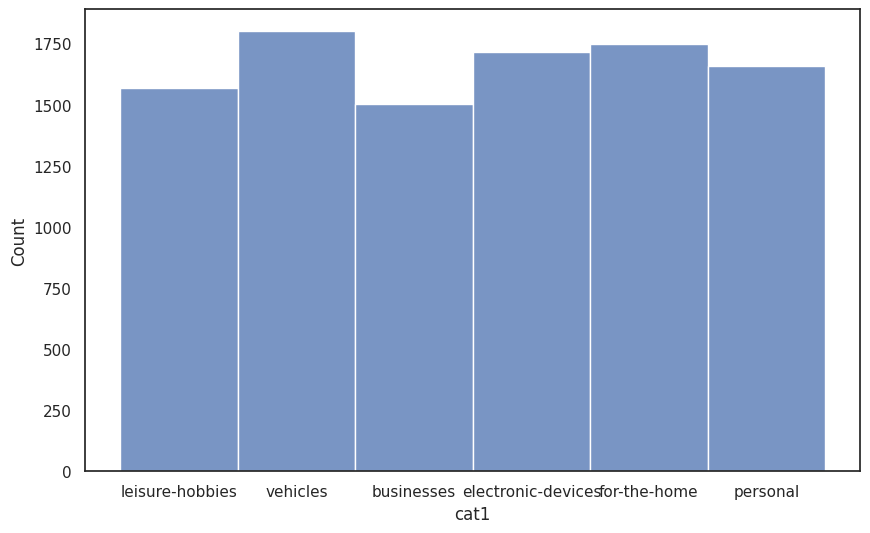

In [26]:
f, ax = plt.subplots(figsize=(10,6))
sns.histplot(data = uniform_output_y)

In [27]:
for idx , sent in enumerate(uniform_input_x['desc']):
    sent = sent.replace('$NUM' , ' ')
    uniform_input_x['desc'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])
    if idx % 1000 == 0:
      print(idx)

<ipython-input-27-5941caa7683c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_input_x['desc'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [28]:
for idx , sent in enumerate(uniform_input_x['title']):
    sent = normalizer.normalize(sent)
    uniform_input_x['title'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])
    if idx % 1000 == 0:
      print(idx)

<ipython-input-28-b81e222e959a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_input_x['title'][idx] = '  '.join([str(elem) for elem in [t for t in word_tokenize(sent) if t not in stopwords]])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [29]:
normalizer = Normalizer()
scalar = StandardScaler()
numeric_scaled_features = pd.DataFrame(scalar.fit_transform(uniform_input_x[['price']]) , columns=['price'])

In [30]:
tfidf_generator = TfidfVectorizer(ngram_range=(1, 1), norm='l2', use_idf=True, preprocessor=normalizer.normalize, tokenizer=word_tokenize)
desc_tfidt_matrix = tfidf_generator.fit_transform(uniform_input_x['desc'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
tfidf_generator = TfidfVectorizer(ngram_range=(1, 1), norm='l2', use_idf=True, preprocessor=normalizer.normalize, tokenizer=word_tokenize)
title_tfidt_matrix = tfidf_generator.fit_transform(uniform_input_x['title'])

In [32]:
svd = TruncatedSVD(n_components=100, n_iter=7)
svd.fit(desc_tfidt_matrix)
desc_data_svd = svd.transform(desc_tfidt_matrix)
desc_data_svd = pd.DataFrame(desc_data_svd, columns=[i for i in range(0,100)])

In [33]:
svd = TruncatedSVD(n_components=100, n_iter=7)
svd.fit(title_tfidt_matrix)
title_data_svd = svd.transform(title_tfidt_matrix)
title_data_svd = pd.DataFrame(title_data_svd, columns=[i for i in range(100,200)])

In [34]:
uniform_input_x = pd.concat([desc_data_svd , title_data_svd , numeric_scaled_features], axis=1) 

all_uniform_data_df = pd.concat([uniform_input_x ,uniform_output_y], axis=1) 
all_uniform_data_df.to_csv('tfidf_tsvd_uniform_df.csv')

In [46]:
uniform_input_x.columns = uniform_input_x.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(uniform_input_x, uniform_output_y, test_size=0.25, random_state=16)

In [47]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The f1 score for the testing data: 0.7696173248319781


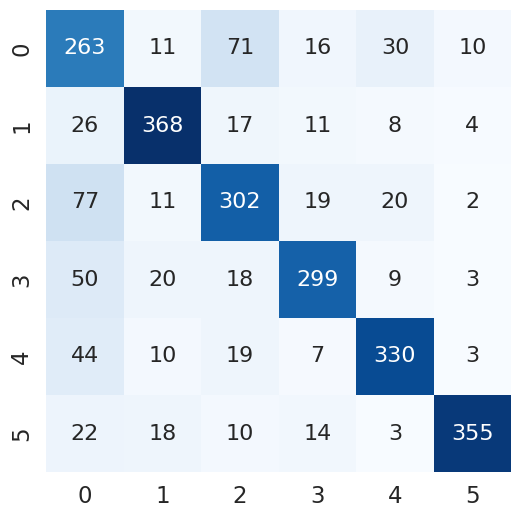

In [48]:
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, y_pred , average='macro')
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, y_pred)

In [37]:
accuracy_score(y_test, y_pred)

0.7668

https://medium.com/analytics-vidhya/how-to-web-scrape-data-from-infinite-scrolling-page-da02b3bd04dc